# Mie Performance and Jitting

This shows how much faster the jitted code is.

**Scott Prahl**

**May 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import miepython.miepython_nojit as miepython
import miepython.miepython as miepython_jit
%config InlineBackend.figure_format = 'retina'

## Size Parameters

We will use `%timeit` to see speeds for unjitted code, then jitted code

23.6 µs ± 551 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
197 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.03 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.34 ms ± 22 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.3 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69.3 ms ± 646 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.04 µs ± 4.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.95 µs ± 40 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.9 µs ± 173 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
79.6 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
318 µs ± 889 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.24 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


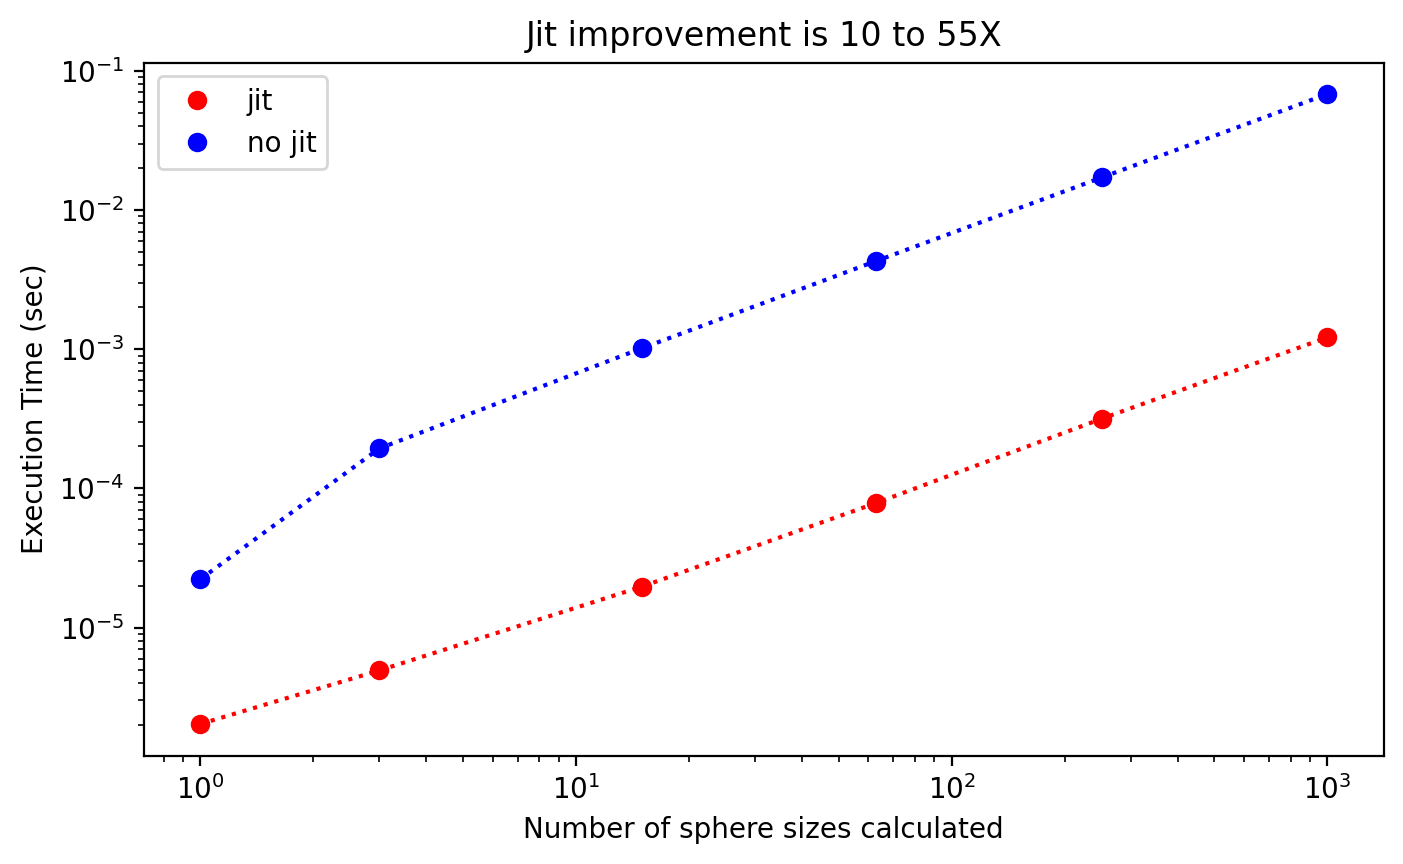

In [2]:
ntests=6

m=1.5
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython.mie(m,x)
    result[i]=a.best

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(m,x)
    resultj[i]=a.best

improvement = result/resultj

plt.figure(figsize=(8,4.5))
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of sphere sizes calculated")
plt.ylabel("Execution Time (sec)")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Embedded spheres

91.6 µs ± 999 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
221 µs ± 6.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.05 ms ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.4 ms ± 26.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.4 ms ± 140 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69 ms ± 775 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.82 µs ± 22.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.03 µs ± 41.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
19.5 µs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
77.5 µs ± 638 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
295 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.17 ms ± 13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


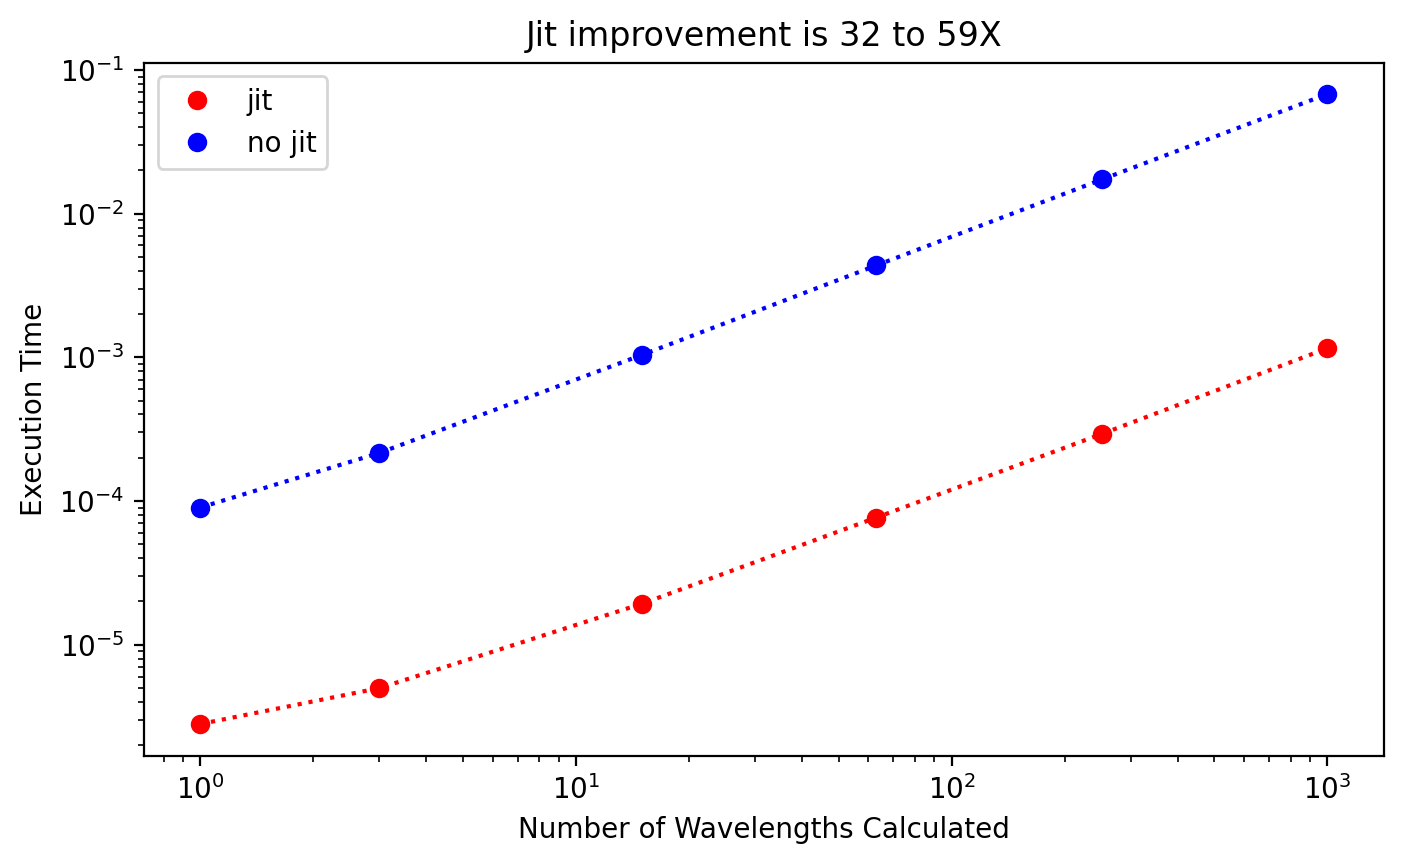

In [3]:
ntests = 6
mwater = 4/3   # rough approximation
m=1.0
mm = m/mwater
r=500                            # nm

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython.mie(mm,xx)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython_jit.mie(mm,xx)
    resultj[i]=a.best

improvement = result/resultj

plt.figure(figsize=(8,4.5))
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Testing `ez_mie`

Another high level function that should be sped up by jitting.

93.6 µs ± 754 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
226 µs ± 8.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.07 ms ± 7.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.45 ms ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.6 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69.7 ms ± 748 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.87 µs ± 19.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.08 µs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
20.8 µs ± 69.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
78.3 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
297 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.18 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


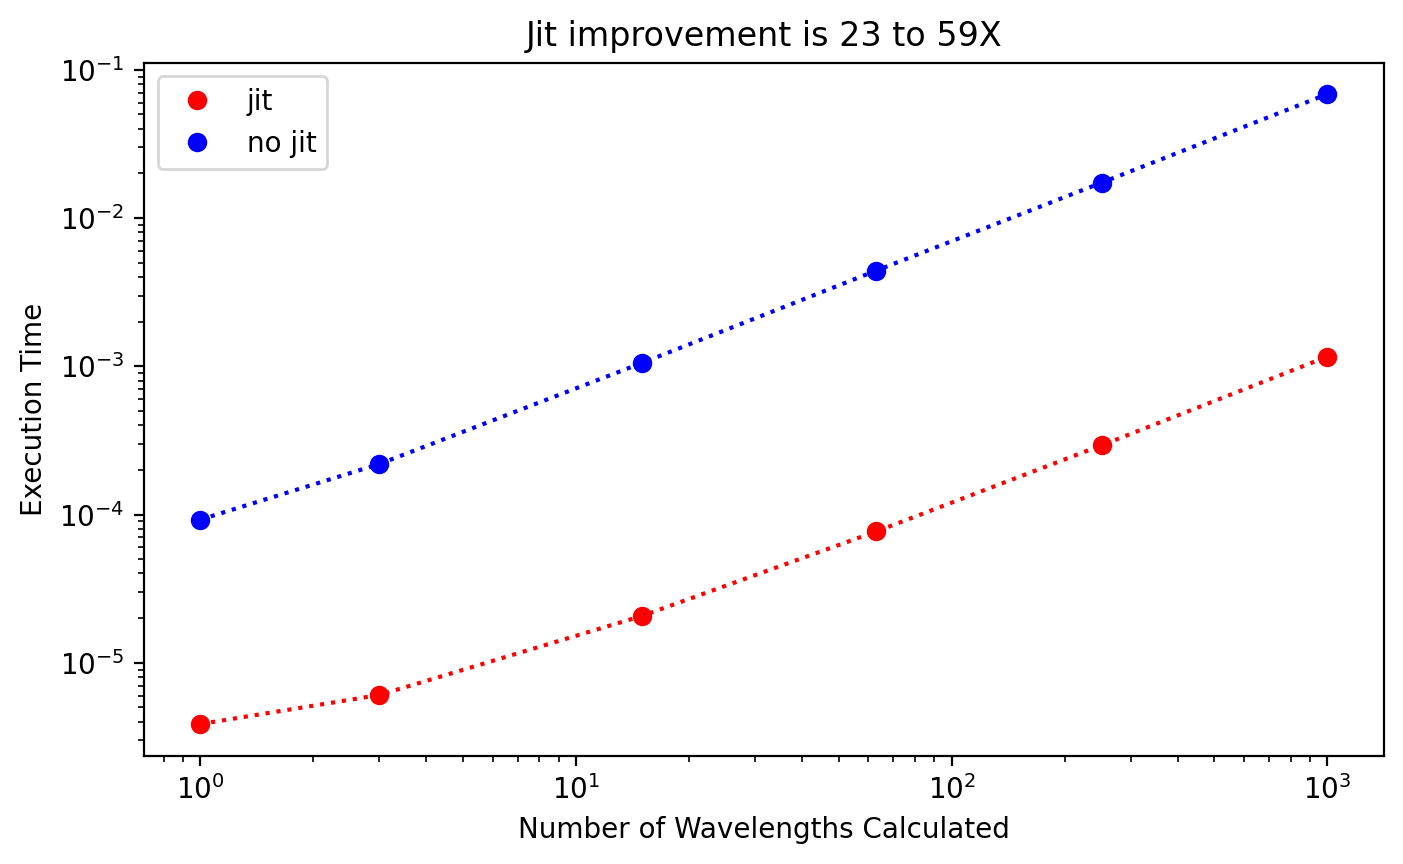

In [4]:
ntests=6
m_sphere = 1.0
n_water  = 4/3
d = 1000                        # nm
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython.ez_mie(m_sphere, d, lambda0, n_water)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython_jit.ez_mie(m_sphere, d, lambda0, n_water)
    resultj[i]=a.best

improvement = result/resultj

plt.figure(figsize=(8,4.5))
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Scattering Phase Function

53.9 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
67.5 µs ± 643 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
156 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
505 µs ± 9.13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.87 ms ± 15.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
7.36 ms ± 24.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.78 µs ± 20.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.85 µs ± 45.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.42 µs ± 11 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.39 µs ± 90.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.3 µs ± 71.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
44.3 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


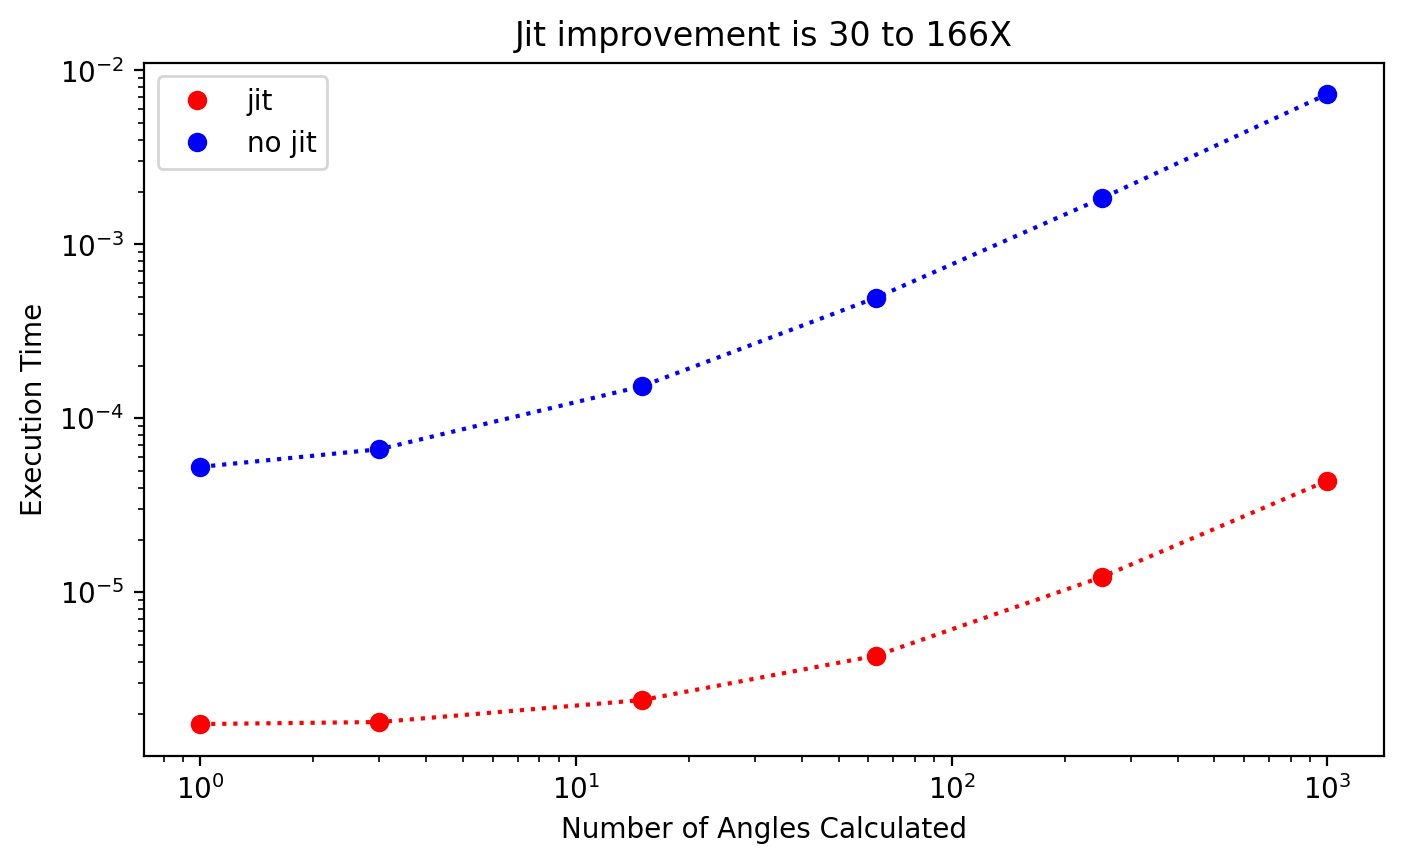

In [5]:
ntests = 6
m = 1.5
x = np.pi/3

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x,mu)
    result[i]=a.best

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x,mu)
    resultj[i]=a.best

improvement = result/resultj

plt.figure(figsize=(8,4.5))
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Angles Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## And finally, as function of sphere size

425 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
732 µs ± 6.03 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.74 ms ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
5.08 ms ± 50.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.1 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
69.4 ms ± 384 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
6.05 µs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.6 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
33.3 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
111 µs ± 321 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
409 µs ± 885 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


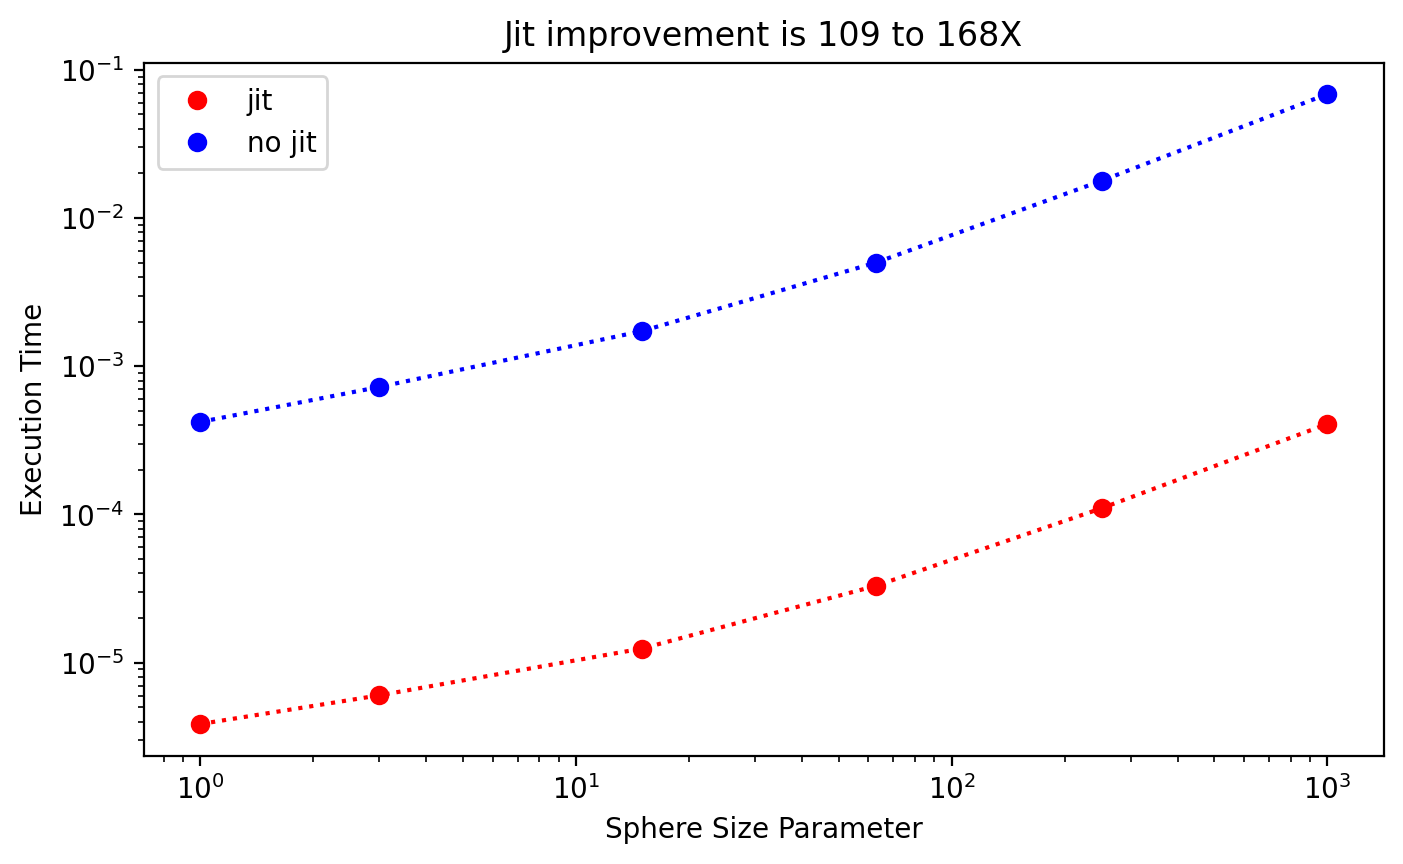

In [6]:
ntests=6
m = 1.5-0.1j
x = np.logspace(0,3,ntests)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

theta = np.linspace(-180,180)
mu = np.cos(theta/180*np.pi)

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x[i],mu)
    result[i]=a.best

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython_jit.mie_S1_S2(m,x[i],mu)
    resultj[i]=a.best

improvement = result/resultj

plt.figure(figsize=(8,4.5))
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Sphere Size Parameter")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()